In [1]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [2]:
import pandas as pd
df = pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [7]:
df.shape

(600, 6)

Exploring Data : Finding outliers

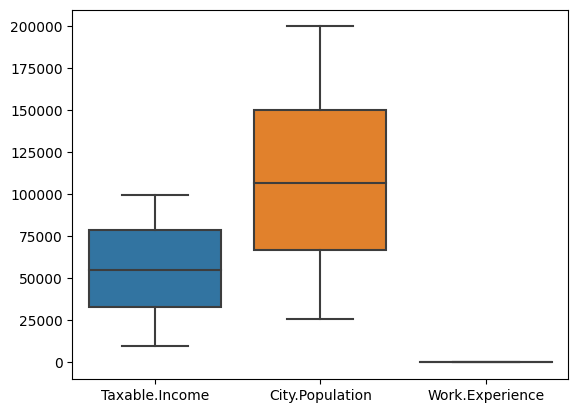

In [8]:
import seaborn as sns
all= sns.boxplot(df)

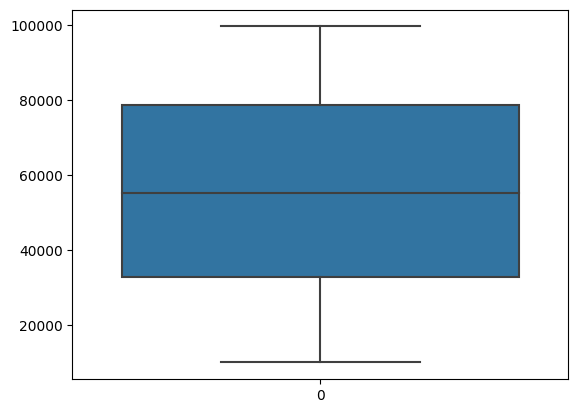

In [10]:
ax = sns.boxplot(df['Taxable.Income'])

From the above plot we can observe that there are no outliers in the data

In [11]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


<ipython-input-13-c57cfd3dbcc6>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df['Taxable.Income'],shade=True,color='b')


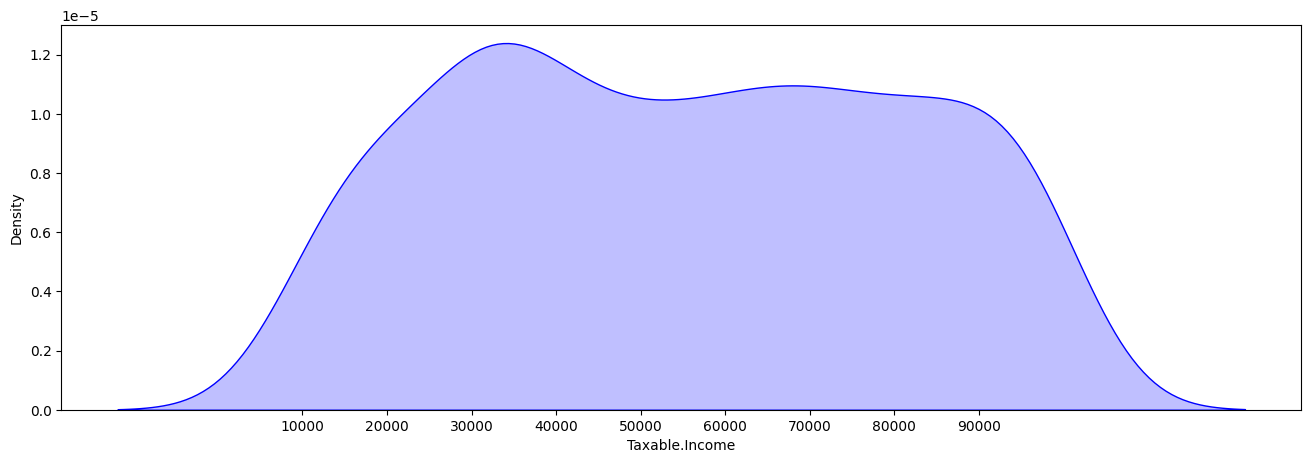

In [13]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(df['Taxable.Income'],shade=True,color='b')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

The data is Skwed on the right
The data has negative Kurtosis

In [14]:
obj_colum = df.select_dtypes(include='object').columns.tolist()

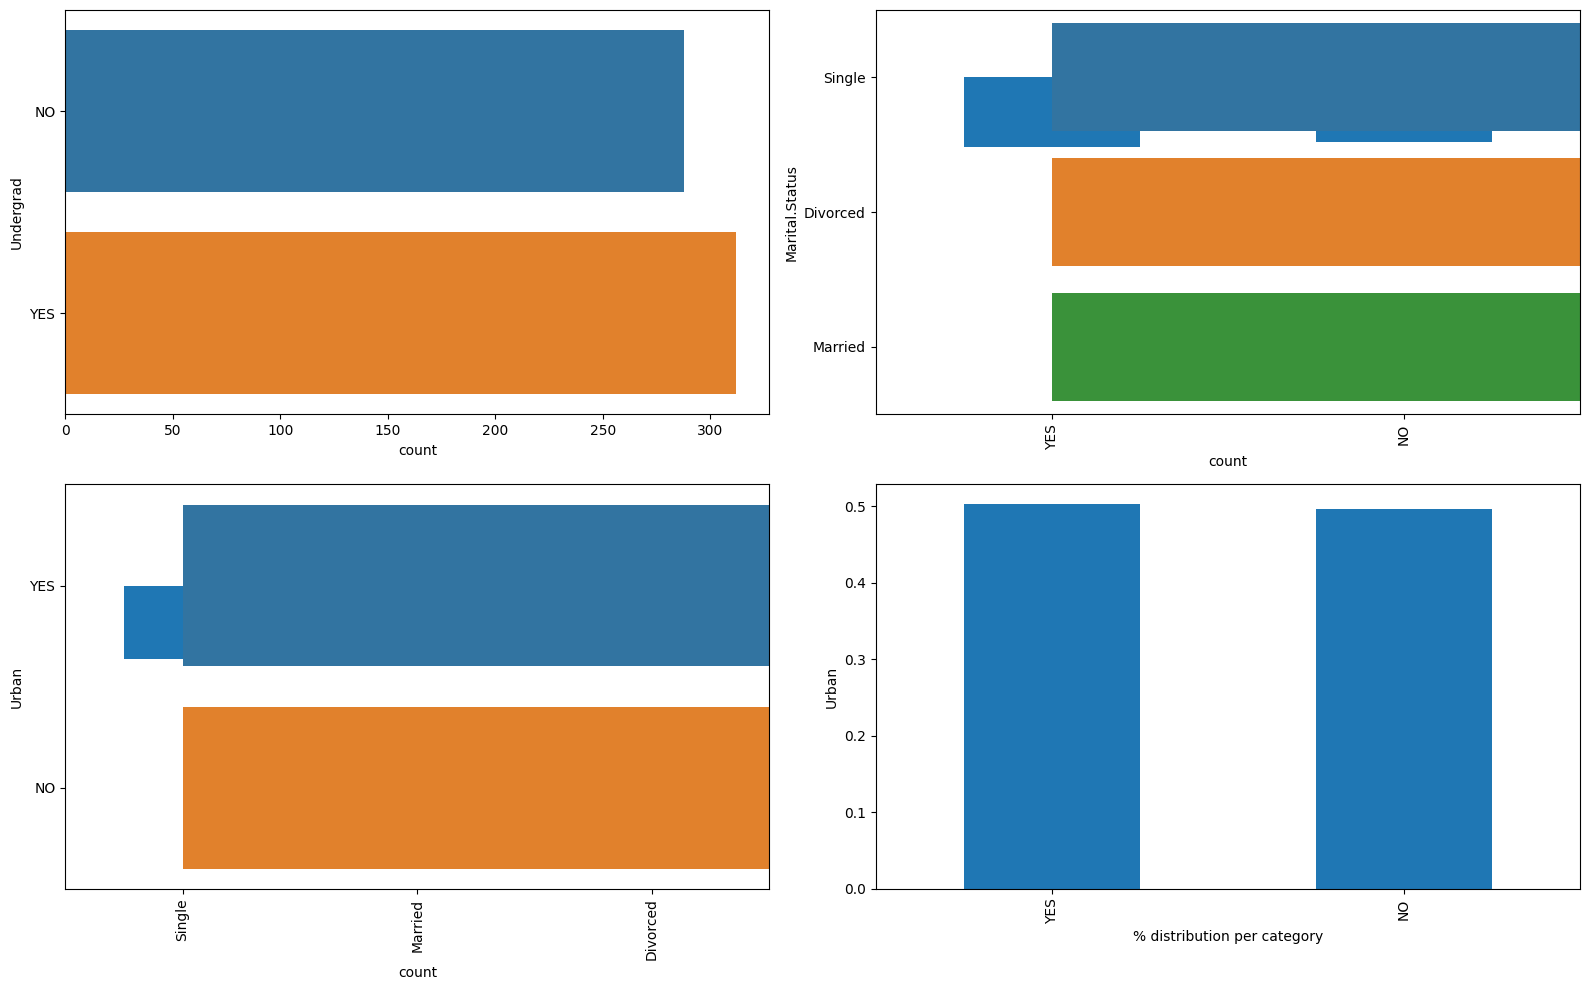

In [15]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df,y=col)
    plt.subplot(2,2,i+1)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [16]:
num_columns = df.select_dtypes(exclude='object').columns.tolist()

<ipython-input-17-580362cfca90>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='g',shade=True)
<ipython-input-17-580362cfca90>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='g',shade=True)
<ipython-input-17-580362cfca90>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='g',shade=True)


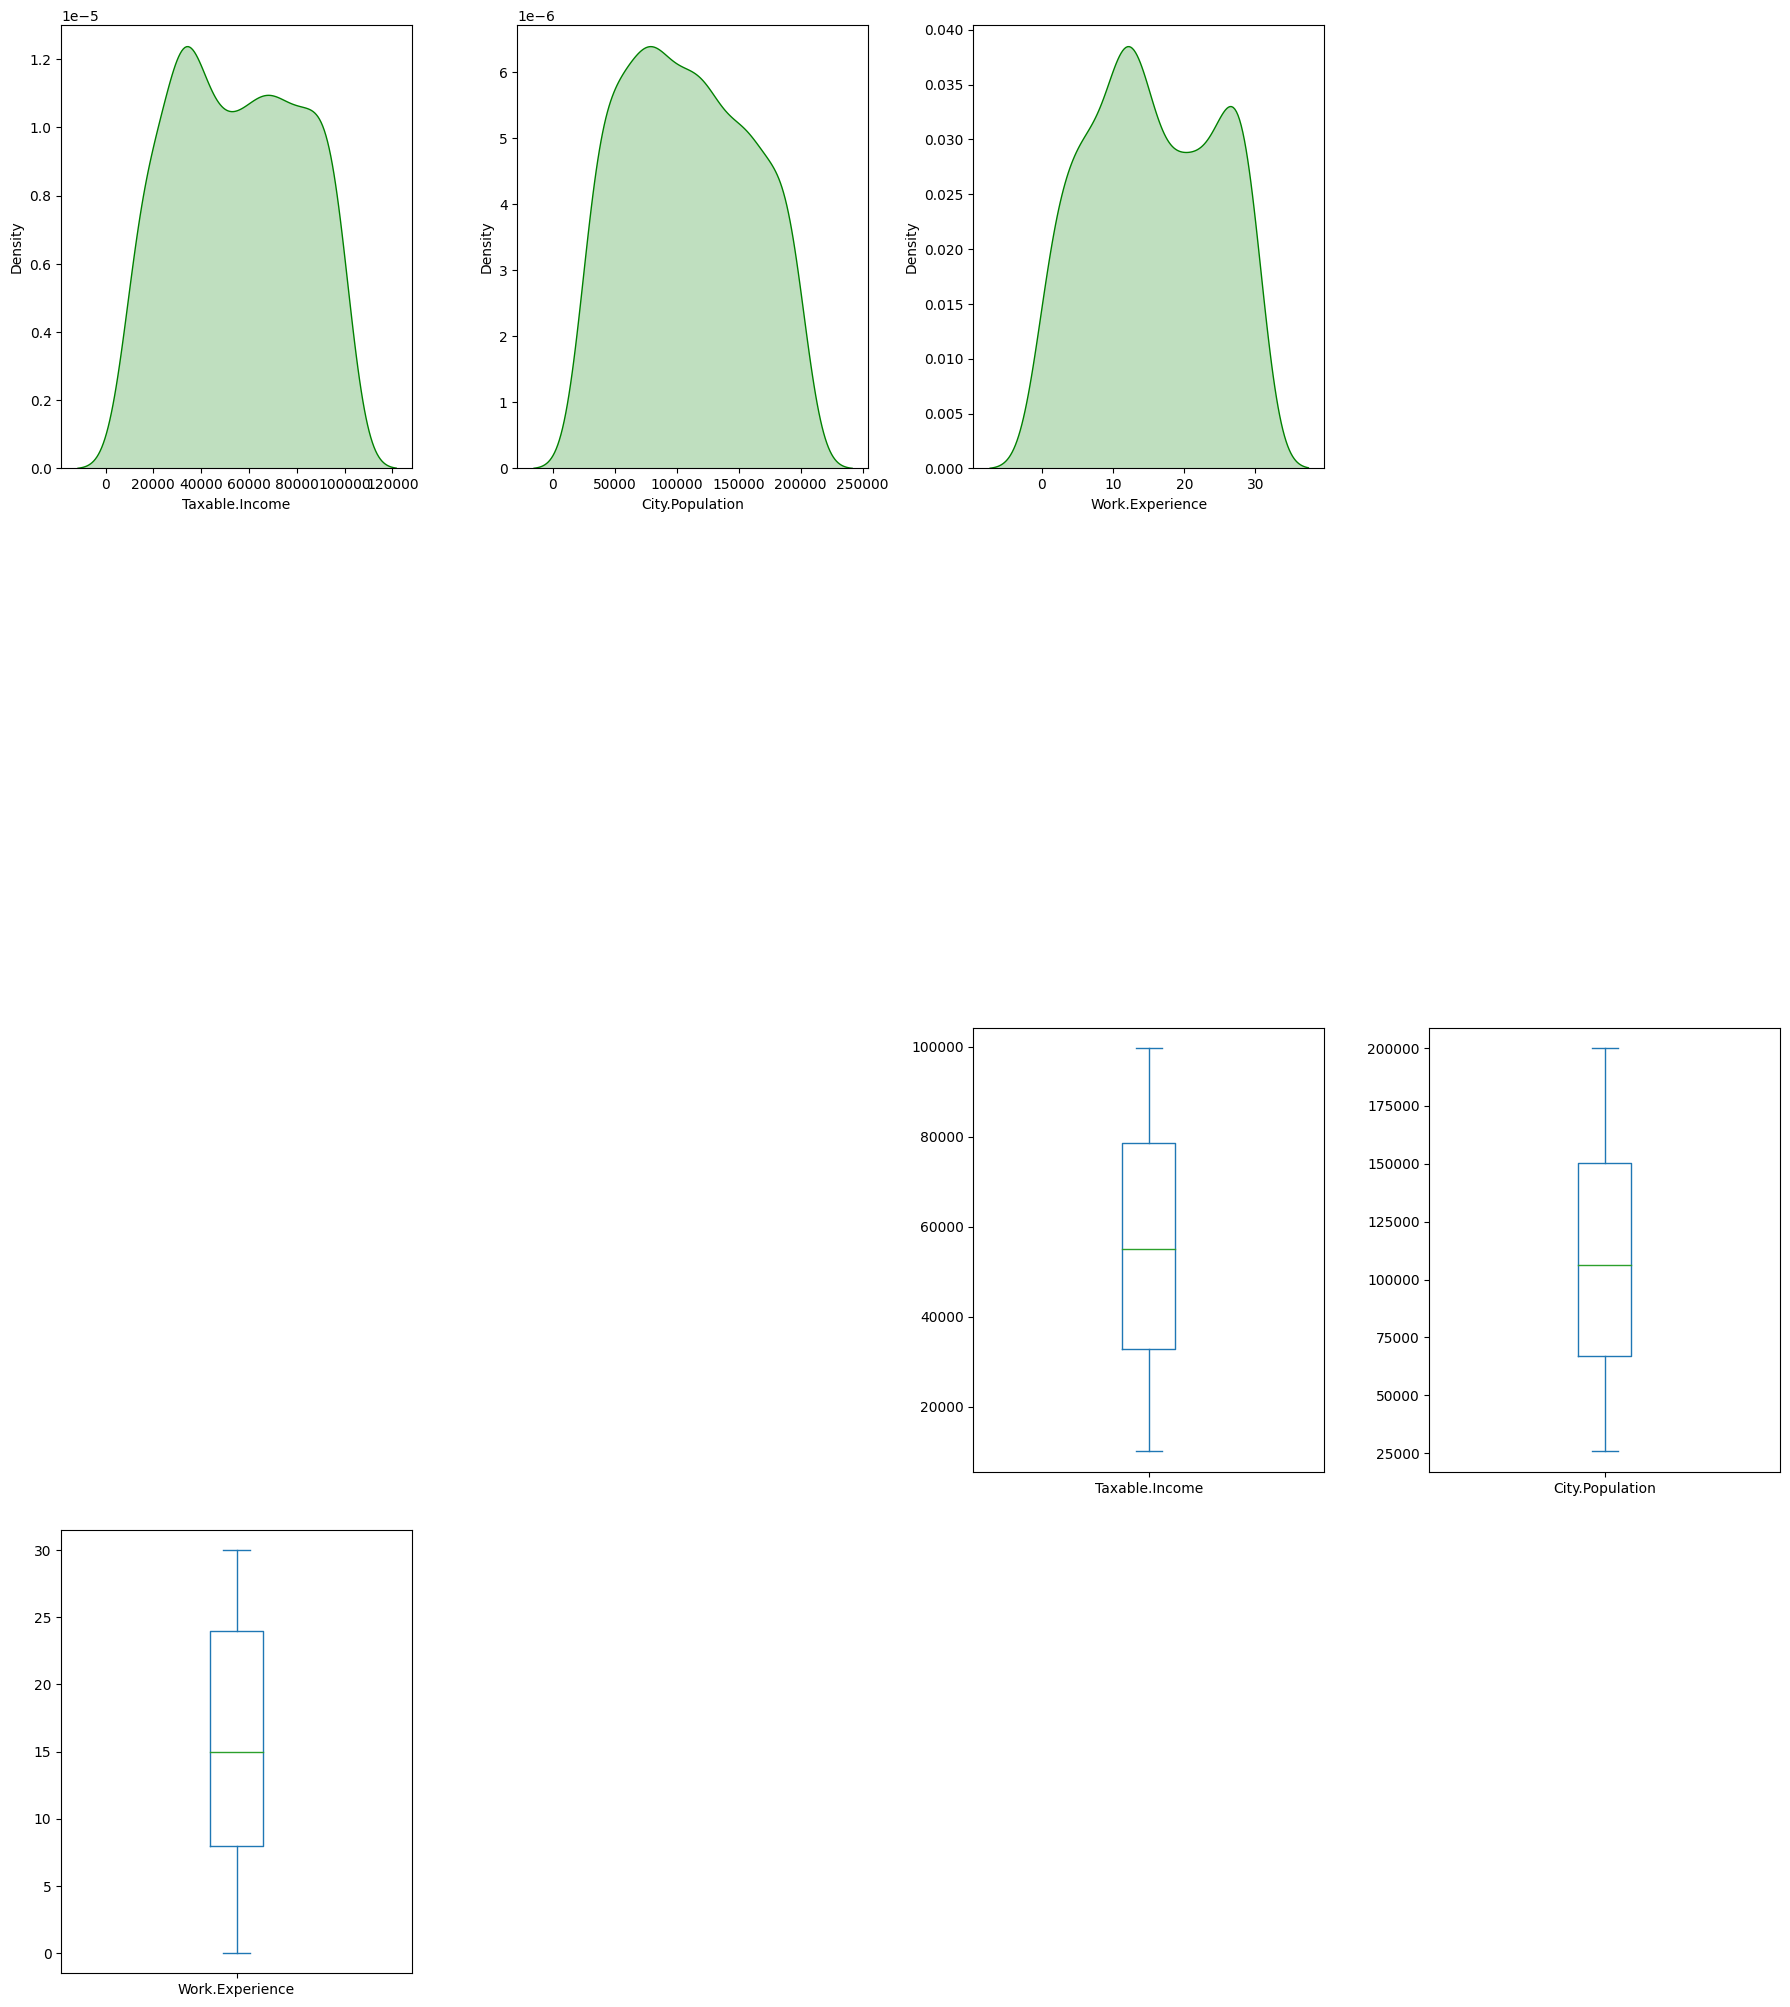

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [17]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout()
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [18]:
df = pd.get_dummies(df, columns = ['Undergrad','Marital.Status','Urban'])

Correlation between variables

In [19]:
corr = df.corr()

<Axes: >

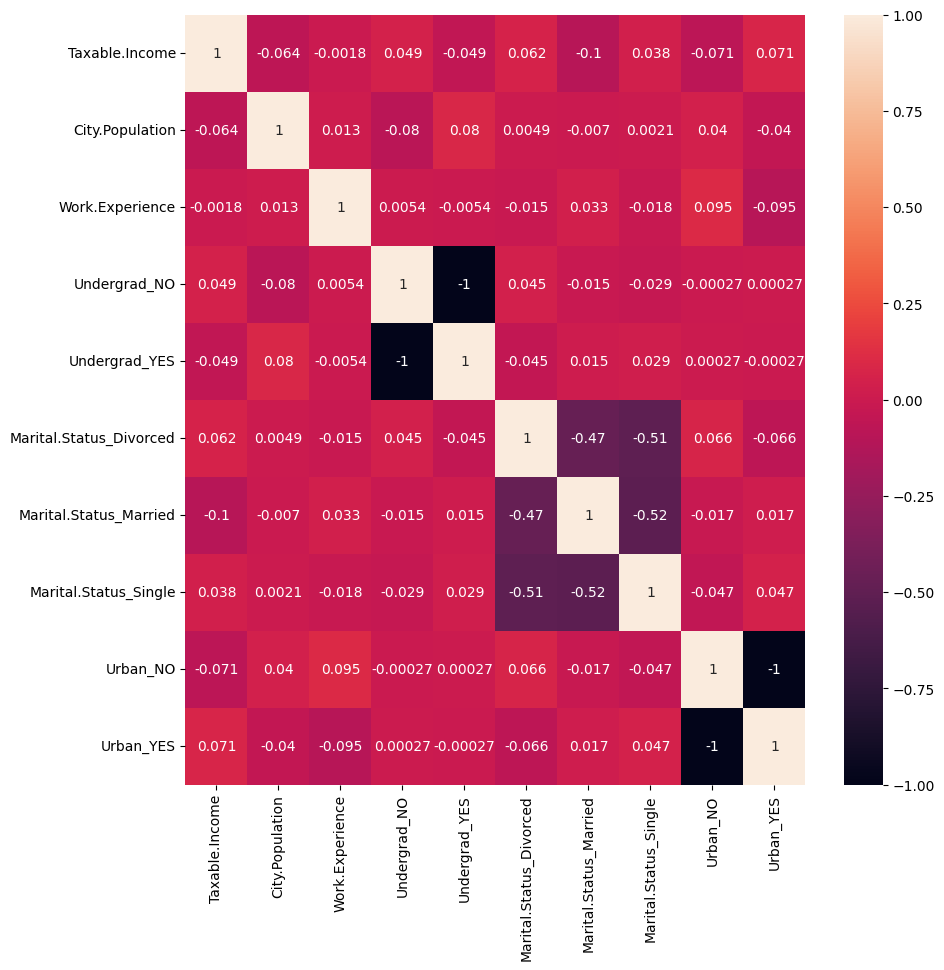

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

Decision Tree

Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [22]:
df['Taxable.Income']=pd.cut(df['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])
list(df.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [23]:
X = df.iloc[:,1:10]
y = df.iloc[:,0]

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


In [25]:
y_train.value_counts()

good     382
risky     98
Name: Taxable.Income, dtype: int64

In [26]:
from sklearn.tree import DecisionTreeClassifier as DT
model = DT(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [27]:
pred_train = model.predict(x_train)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,pred_train)

1.0

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,pred_train)

array([[382,   0],
       [  0,  98]])

In [30]:
pred_test = model.predict(x_test)

In [31]:
accuracy_score(y_test,pred_test)

0.6083333333333333

In [32]:
confusion_matrix(y_test,pred_test)

array([[68, 26],
       [21,  5]])

In [33]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})
df_t

,Actual,Predicted
149,good,good
302,good,good
81,good,good
24,good,good
584,good,risky
...,...,...
90,good,risky
509,risky,good
536,good,good
494,good,good


In [34]:
cols = list(df.columns)

In [35]:
predictors = cols[1:10]
target = cols[0]

In [36]:
from io import StringIO
dot_data = StringIO()

In [37]:
pip install graphviz

In [39]:
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.image as mpimg
export_graphviz(model, out_file = dot_data ,filled = True,rounded =True,feature_names = predictors,class_names = target, impurity = False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('fraud_full.png')

True

Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 69%
As seen in the confusion matrix of Test data 73 instances are presdected correctly and 47 instances are not

In [40]:
img = mpimg.imread('fraud_full.png')


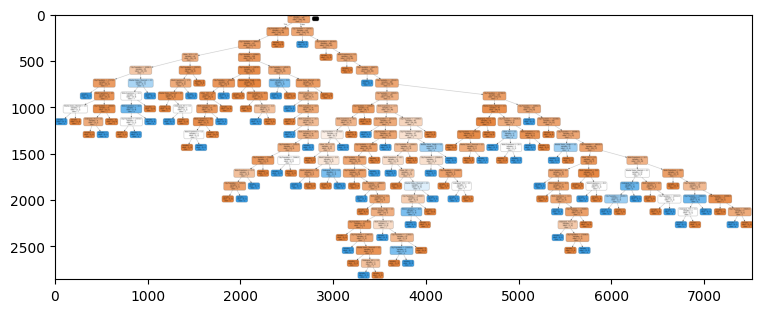

In [41]:
plt.imshow(img)

In [42]:
model.feature_importances_

array([0.51855745, 0.2686405 , 0.01600522, 0.04379149, 0.03774684,
       0.03625181, 0.03741774, 0.01638829, 0.02520065])

In [43]:
fi = pd.DataFrame({'feature': list(x_train.columns),'importance': model.feature_importances_}).sort_values('importance', ascending = False)
fi

,feature,importance
0,City.Population,0.518557
1,Work.Experience,0.268640
3,Undergrad_YES,0.043791
4,Marital.Status_Divorced,0.037747
6,Marital.Status_Single,0.037418
5,Marital.Status_Married,0.036252
8,Urban_YES,0.025201
7,Urban_NO,0.016388
2,Undergrad_NO,0.016005


As seen in the above City.Population is most important feature in the decision tree